# Punto 1
> Una de las habilidades de un experto en inteligencia artificial y aprendizaje automático es tener la capacidad de generar conjuntos de datos experimentales para poner a prueba los diferentes modelos que va construyendo durante el desarrollo de su carrera. Investiga cuáles de las diversas herramientas de Python incluyen la funcionalidad de realizar esta acción y construye artificialmente los siguientes conjuntos de datos:

1.   Conjunto de datos de tres características linealmente relacionados.

In [81]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
df = px.data.tips()
X = df.total_bill.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, df.tip)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = px.scatter(df, x='total_bill', y='tip',color="sex", opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

2.   Conjunto de datos de cuatro características, relacionados de forma completa, no lineal.

In [69]:
import plotly.express as px

df1 = px.data.stocks(datetimes=True)
fig = px.scatter(df1, x="date", y="GOOG",color="FB",trendline="lowess")
fig.show()

3.   Conjunto de datos que, de manera prevista, puedan expresar una relación lineal.

In [70]:
import plotly.express as px
df = px.data.tips()
fig = px.ecdf(df, x="total_bill", color="sex", markers=True, lines=False, marginal="histogram")
fig.show()


2.	Investiga la manera en que se realiza el análisis de discriminarte lineal Python y utiliza este conocimiento para llevar a cabo la reducción de la dimensión y la representación gráfica del primer conjunto de datos construido en la pregunta anterior.

In [71]:
dataset = pd.read_csv('Airbnb_European/Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [72]:
# Dividivmos el conjunto de datos en muestra de entrenamiento y 
# muestra de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [73]:
# Ajuste de Escalas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
# Aplicando LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [75]:
# Comprobamos las variables independientes resultantes con 
# una regresion Logistica para determinar que con solo dos
# variables obtenemos la predicción adecuada
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [76]:
# Prediccion del conjunto de prueba para 
# comprar los resultados
y_pred = classifier.predict(X_test)

In [77]:
# Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\leona\AppData\Local\Temp\ipykernel_13184\2914510898.py:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



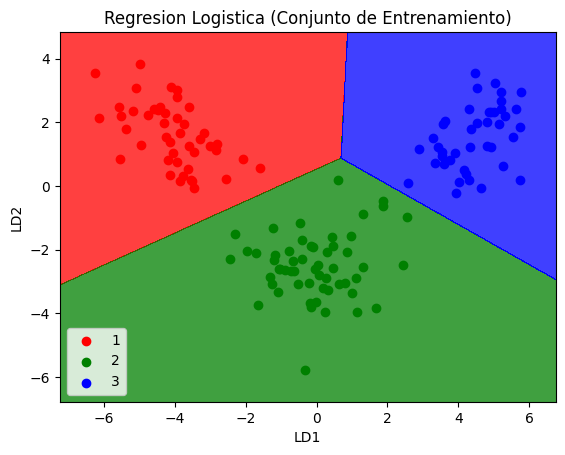

In [78]:
# Visualizacion de los datos de entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Regresion Logistica (Conjunto de Entrenamiento)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

C:\Users\leona\AppData\Local\Temp\ipykernel_13184\307229187.py:11: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



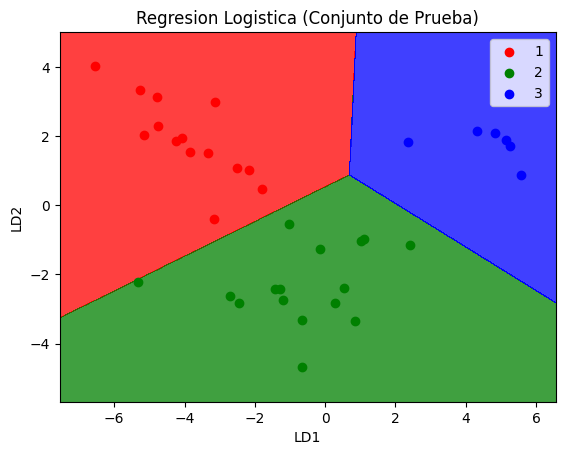

In [79]:
# Visualizacion de los resultados de prueba
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Regresion Logistica (Conjunto de Prueba)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

3.	Utilizando la librería Scikit-learn, investiga cómo se implementan las métricas del error cuadrático medio y del coeficiente de determinación  para evaluar la calidad de un modelo de aprendizaje supervisado.

In [80]:
Y_verdadero = [1,2,3,4,5]
Y_predicto = [1,2,3,4,-5]

max_error(Y_verdadero,Y_predicto)

10